In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline


df=pd.read_csv("training_data_2_csv_UTF.csv")
m_train_raw=df[df.columns.tolist()[:-1]]
n_train_raw=df[df.columns.tolist()[-1:]]
m_test_raw=pd.read_csv("test_data_4_students.csv")

m_test_raw=m_test_raw.drop(m_test_raw.index[575:])
m_test_raw

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,favorites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,2.281293e+09,2281292622,__keating,brooklyn,lgbt editor at @buzzfeed. shannon.keating@buzz...,https://t.co/QneJmYRyhj,4466,1295,111,Tue Jan 07 23:26:52 +0000 2014,1579,TRUE,3036.0,en,{'created_at': 'Tue Apr 11 15:31:51 +0000 2017...,FALSE,FALSE,FALSE,shannon keating,NaN
1,2.344040e+09,2344040251,_callme_Dani,"Los Angeles, CA",News Curation Editor @BuzzFeedNews \rI do a lo...,NaN,295,1016,10,Fri Feb 14 19:45:56 +0000 2014,300,FALSE,618.0,en,{'created_at': 'Tue Apr 11 00:56:02 +0000 2017...,FALSE,FALSE,FALSE,Danielle Hopkins,NaN
2,7.658713e+08,765871267,_little_britt_,NaN,Family comes first! Also I am in love with piz...,https://t.co/E7DE1cJB7e,1001678,3017,14,8/18/2012 15:13,13040,TRUE,3329.0,en,"{'place': None, 'retweeted': False, 'favorited...",TRUE,FALSE,TRUE,Brittney Smith,NaN
3,4.772373e+09,4772373433,134k5,NaN,@BuzzFeedJapan ‰  @cnet_japan / DMŽÐÜ‹ã‹_‹...,https://t.co/Cbguzs2PjT,445,487,17,Sun Jan 17 07:11:45 +0000 2016,1112,FALSE,46.0,ja,{'created_at': 'Sat Apr 08 08:41:08 +0000 2017...,FALSE,FALSE,TRUE,Keigo Isashi,NaN
4,1.324549e+09,None,2181chrom_bot,è‡ªåˆ†ã®å¤©å¹•,ã“ã‚Œã¯FEè¦šé†’ã®ã‚¯ãƒ­ãƒ â€¦ã¤ã¾ã‚Šä¿ºã...,http://t.co/10Swf6luED,187,68,13,Wed Apr 03 13:00:42 +0000 2013,None,None,690359.0,ja,"{u'lang': u'ja', u'text': u'@2181lucina_bot \u...",None,None,None,ãƒ„ã‚¤å»ƒã‚¯ãƒ­ãƒ bot,NaN
5,2.561342e+09,None,2LA1R_bot,None,ãµã‚Œã‚èªžã‚’ã¤ã¶ã‚„ãbotã§ã™ ãŸã¾ã«...,None,80,87,None,Wed Jun 11 13:12:06 +0000 2014,None,None,20167.0,ja,"{u'lang': u'ja', u'text': u'\u3010\u3075\u308c...",TRUE,None,None,ãµã‚Œã‚èªžbot ver0.2,NaN
6,3.478101e+08,None,3pei_bot,ä¸‰æ²³å±‹,â– ã¡ã‚ãƒ¼ã™ï¼ä¸‰æ²³å±‹ã§ãƒ¼ã™ï¼ä¸‰éƒŽã...,http://twpf.jp/3pei_bot,2020,1978,56,Wed Aug 03 11:52:59 +0000 2011,None,None,968182.0,ja,"{u'lang': u'ja', u'text': u'@kazenoraby \uff66...",TRUE,None,None,ä¸‰æ²³å±‹ä¸‰å¹³,NaN
7,8.563039e+08,None,94kichi_bot,None,94 ãƒãƒ£ãƒƒã‚¯ãƒ»ã‚¦ã‚£ãƒ«ã‚½ãƒ³ã¨æ„‰å¿«ãªä...,None,70,80,2,Mon Oct 01 12:39:46 +0000 2012,None,None,76735.0,ja,"{u'lang': u'ja', u'text': u'\u307f\u3093\u306a...",TRUE,None,None,94å¹´çµ„bot,NaN
8,8.328750e+17,None,A3_Dekasegi_bot,ãƒ“ãƒ­ãƒ¼ãƒ‰é§…å‰,ã‚·ãƒˆãƒ­ãƒ³ã€ŒA3!å‡ºç¨¼ãŽæ—¥èªŒãƒ€ãƒ¨ãƒ¼ï¼ã...,https://t.co/t171JmIrjL,181,144,2,Sat Feb 18 08:50:03 +0000 2017,None,None,1960.0,ja,"{u'lang': u'ja', u'text': u'\u30b7\u30c8\u30ed...",TRUE,None,None,A3! å‡ºç¨¼ãŽæ—¥èªŒ,NaN
9,8.885679e+07,None,aamir_khan,Mumbai,Actor.,https://t.co/l1dUhQjS8Y,20419393,9,6,Tue Nov 10 05:08:56 +0000 2009,None,TRUE,468.0,en,"{u'lang': u'en', u'text': u'Hey guys, doing so...",None,None,None,Aamir Khan,NaN


In [2]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

/Users/chenyunzhe/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import math

m_train=m_train_raw.fillna(value=1)
n_train=n_train_raw.fillna(value=1)
m_test=m_test_raw.fillna(value=1)


for i in m_train.index:
    m_train.set_value(i,'id',1)
    m_train.set_value(i,'id_str',1)

for i in m_test.index:
    m_test.set_value(i,'id',1)
    m_test.set_value(i,'id_str',1)

In [4]:
def log_convert(df):
    cou=df.columns.tolist()
    counts_list= [cou[6]]
    for col in counts_list:
        alist=[]
        for i in df[col]:
            alist.append(i)
        for i in range(len(alist)):
            if alist[i]>10:
                alist[i]=1
            else: alist[i]=0
        selist=pd.Series(alist,index=df.index)
        df[col]=selist
    for col in [cou[7]]:
        alist=[]
        for i in df[col]:
            alist.append(i)
        for i in range(len(alist)):
            if alist[i]>18:
                alist[i]=1
            else: alist[i]=0
        selist=pd.Series(alist,index=df.index)
        df[col]=selist
    for col in [cou[8]]:
        alist=[]
        for i in df[col]:
            alist.append(i)
        for i in range(len(alist)):
            if alist[i]>300:
                alist[i]=1
            else: alist[i]=0
        selist=pd.Series(alist,index=df.index)
        df[col]=selist

    for col in [cou[10]]:
        alist=[]
        for i in df[col]:
            alist.append(i)
        for i in range(len(alist)):
            if alist[i]>5:
                alist[i]=1
            else: alist[i]=0
        selist=pd.Series(alist,index=df.index)
        df[col]=selist

    for col in [cou[12]]:
        alist=[]
        for i in df[col]:
            alist.append(i)
        for i in range(len(alist)):
            if alist[i]>2 and alist[i]<67000 :
                alist[i]=1
            else: alist[i]=0
        selist=pd.Series(alist,index=df.index)
        df[col]=selist
    import string
    counts_list= ['created_at']
    for col in counts_list:
        alist=[]
        for i in df[col]:
            alist.append(i)
        for i in range(len(alist)):
            words=str(alist[i])
            for c in string.punctuation:
                words=words.replace(c, ' ')
            words=words.split()
            for w in words:
                if ('20' in w) and len(w)==4:

                    alist[i]=int(w)-2000
        selist=pd.Series(alist,index=df.index)
        df[col]=selist        
        
        
    robot_list=['screen_name','description','status','name']
    
    
           
    for col in robot_list:
        alist=[]
        for i in df[col]:
            try:
                alist.append(i.lower())
            except:
                alist.append(i)
        for i in range(len(alist)):
            try:
                if 'bot' in alist[i]:
                    alist[i]=1
                else: alist[i]=0
            except:True
        selist=pd.Series(alist,index=df.index)
        df[col]=selist
        
        
log_convert(m_train)
log_convert(m_test)


m_train.head(5)        
    


,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name
0,1.0,1,0,"""Houston, TX""",0,"""https://t.co/dnWuDbFRkt""",1,0,0,17,0,False,0,"""en""",0,True,False,False,0
1,1.0,1,0,"Templeville town, MD, USA",0,1,0,1,0,16,1,False,1,en,0,True,False,False,0
2,1.0,1,1,1,1,https://t.co/P1e1o0m4KC,1,0,0,15,0,False,1,en,1,True,False,False,1
3,1.0,1,0,1,1,1,1,0,0,15,0,False,1,en,0,True,True,False,0
4,1.0,1,0,"Dublin, United States",0,1,1,1,0,15,1,False,1,en,0,False,False,False,0


In [5]:
m_train=m_train.apply(pd.to_numeric,errors='coerce')
m_test=m_test.apply(pd.to_numeric,errors='coerce')
n_train=n_train.apply(pd.to_numeric,errors='coerce')


In [6]:
m_train=m_train.fillna(value=1)
n_train=n_train.fillna(value=1)
m_test=m_test.fillna(value=1)


pd.value_counts(m_train['has_extended_profile'])

0    2327
1     470
Name: has_extended_profile, dtype: int64

In [7]:

m_train.head
m_test.shape

(575, 20)

In [8]:
columns=m_train.columns.tolist()
counts_list= [columns[6],columns[7],columns[8],columns[10],columns[11],columns[12],columns[15],columns[16],columns[17]]

for i in counts_list:
    print pd.value_counts(m_train[i])
    
m_train.head()

1    2403
0     394
Name: followers_count, dtype: int64
1    2036
0     761
Name: friends_count, dtype: int64
0    2088
1     709
Name: listedcount, dtype: int64
1    1704
0    1093
Name: favourites_count, dtype: int64
False    2144
True      653
Name: verified, dtype: int64
1    2500
0     297
Name: statuses_count, dtype: int64
False    1560
True     1237
Name: default_profile, dtype: int64
False    2645
True      152
Name: default_profile_image, dtype: int64
0    2327
1     470
Name: has_extended_profile, dtype: int64


,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name
0,1.0,1,0,1.0,0,1.0,1,0,0,17,0,False,0,1.0,0,True,False,0,0
1,1.0,1,0,1.0,0,1.0,0,1,0,16,1,False,1,1.0,0,True,False,0,0
2,1.0,1,1,1.0,1,1.0,1,0,0,15,0,False,1,1.0,1,True,False,0,1
3,1.0,1,0,1.0,1,1.0,1,0,0,15,0,False,1,1.0,0,True,True,0,0
4,1.0,1,0,1.0,0,1.0,1,1,0,15,1,False,1,1.0,0,False,False,0,0


In [9]:
clfBN=BernoulliNB()
clfDT=tree.DecisionTreeClassifier()
clfGB=GradientBoostingClassifier() 
clfRF=RandomForestClassifier()
clfLR=LogisticRegression()
clfBN=clfBN.fit(m_train,n_train)
clfDT=clfDT.fit(m_train,n_train)
clfGB=clfGB.fit(m_train,n_train)
clfRF=clfRF.fit(m_train,n_train)
clfLR=clfLR.fit(m_train,n_train)




/Users/chenyunzhe/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenyunzhe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [10]:
from sklearn import metrics
class predictScore():
    accuracy=0
    precision=0
    recall=0
    f1=0
    auc=0
    clf=None
    predicted=None
    name=''
    fpr=0
    tpr=0
    threshold=0
    cm=0
    def __init__(self,classifier,name_str):
        self.clf = classifier
        self.name=name_str
        
predict_score_BN=predictScore(clfBN,'BernoulliNB')
predict_score_DT=predictScore(clfDT,'Decision Tree')     
predict_score_GB=predictScore(clfGB,'Gradient Boosting Decision Tree') 
predict_score_RF=predictScore(clfRF,'Random Forest')
predict_score_LR=predictScore(clfLR,'Logistic Regression')
predicted_scores=[predict_score_BN,predict_score_DT,predict_score_GB,predict_score_RF,predict_score_LR]

for i in predicted_scores:
    predicted=i.clf.predict(m_train)
    i.accuracy=metrics.accuracy_score(predicted,n_train['bot'])
    i.precision=metrics.precision_score(predicted,n_train['bot'])
    i.recall=metrics.recall_score(predicted,n_train['bot'])
    i.f1=metrics.f1_score(predicted,n_train['bot'])   
    i.auc=metrics.roc_auc_score(predicted,n_train['bot'])
    i.fpr,i.tpr,i.threshold=metrics.roc_curve(predicted,n_train['bot'])
    i.cm=metrics.confusion_matrix(predicted,n_train['bot'])


BernoulliNB
('Accuracy  =', 0.85377189846263857)
('Precision =', 0.85768357305071918)
('Recall    =', 0.83677991137370755)
('F1        =', 0.84710280373831792)
('Auc score =', 0.85324789054478867)
ROC curve of BernoulliNB:



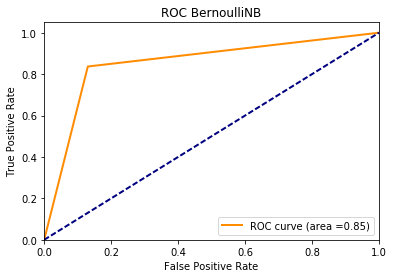

Confusion matrix, without normalization
[[1255  188]
 [ 221 1133]]


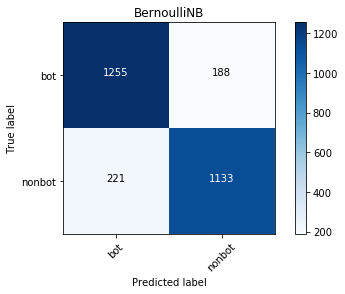


Decision Tree
('Accuracy  =', 0.94029317125491596)
('Precision =', 0.92202876608629825)
('Recall    =', 0.9500780031201248)
('F1        =', 0.93584325777948518)
('Auc score =', 0.94104560222012834)
ROC curve of Decision Tree:



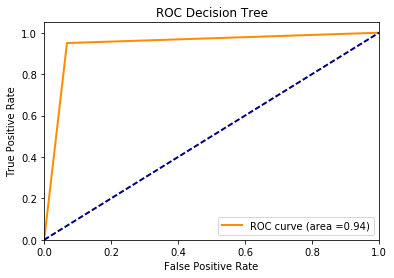

Confusion matrix, without normalization
[[1412  103]
 [  64 1218]]


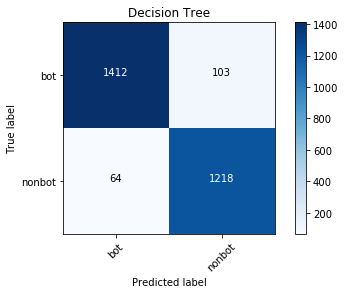


Gradient Boosting Decision Tree
('Accuracy  =', 0.90954594208080086)
('Precision =', 0.9326267978803936)
('Recall    =', 0.88252148997134672)
('F1        =', 0.90688259109311731)
('Auc score =', 0.90949771857596595)
ROC curve of Gradient Boosting Decision Tree:



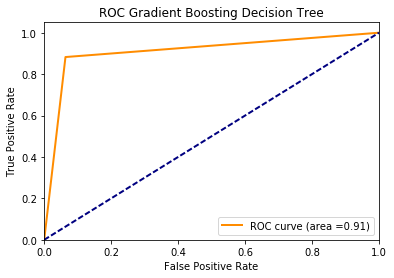

Confusion matrix, without normalization
[[1312   89]
 [ 164 1232]]


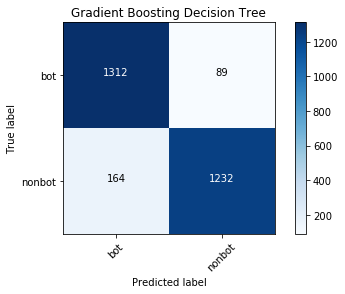


Random Forest
('Accuracy  =', 0.93707543796925274)
('Precision =', 0.92202876608629825)
('Recall    =', 0.94345468628969786)
('F1        =', 0.93261868300153139)
('Auc score =', 0.9375307960000947)
ROC curve of Random Forest:



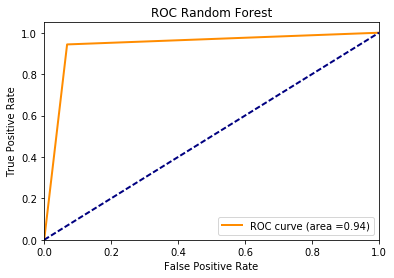

Confusion matrix, without normalization
[[1403  103]
 [  73 1218]]


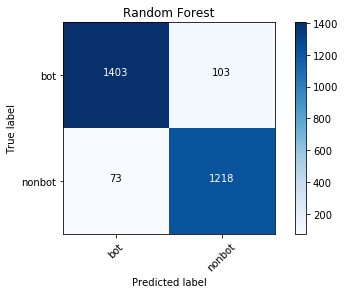


Logistic Regression
('Accuracy  =', 0.89488737933500184)
('Precision =', 0.9023467070401211)
('Recall    =', 0.87840825350036844)
('F1        =', 0.89021657953696787)
('Auc score =', 0.8944124600835176)
ROC curve of Logistic Regression:



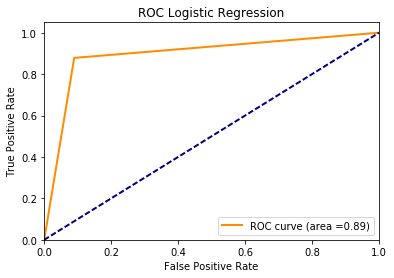

Confusion matrix, without normalization
[[1311  129]
 [ 165 1192]]


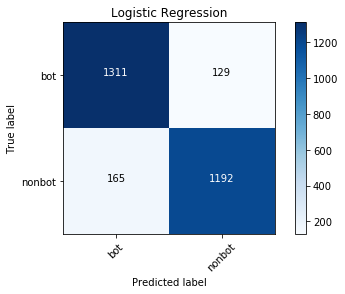

In [11]:
for i in predicted_scores:
    print '\n',i.name
    print ('Accuracy  =',i.accuracy)
    print ('Precision =',i.precision)
    print ('Recall    =',i.recall)
    print ('F1        =',i.f1)
    print ('Auc score =',i.auc)
    print 'ROC curve of '+i.name+':\n'
    plt.figure()
    lw = 2
    plt.plot(i.fpr, i.tpr, color='darkorange',lw=lw, label='ROC curve (area =%.2f)'% i.auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC %s'%i.name)
    plt.legend(loc="lower right")
    plt.show()
    
    import itertools
    plt.figure()
    cm = i.cm
    cmap=plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(i.name)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['bot','nonbot'], rotation=45)
    plt.yticks(tick_marks, ['bot','nonbot'])

    print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [25]:
class CrossValueScore:
    accuracy=0
    precision=0
    recall=0
    f1=0
    auc=0
    clf=None
    name=''
    def __init__(self,classifier,name_str):
        self.clf = classifier
        self.name=name_str
cross_score_BN=CrossValueScore(clfBN,'BernoulliNB')
cross_score_DT=CrossValueScore(clfDT,'Decision Tree')
cross_score_GB=CrossValueScore(clfGB,'Gradient Boosting Decision Tree')
cross_score_RF=CrossValueScore(clfRF,'Random Forest')
cross_score_LR=CrossValueScore(clfLR,'Logistic Regression')

scores=[cross_score_BN,cross_score_DT,cross_score_GB,cross_score_RF,cross_score_LR]

for i in scores:
    i.accuracy=cross_val_score(i.clf,m_train,n_train['bot'],scoring='accuracy',cv=10)
    i.precision=cross_val_score(i.clf,m_train,n_train['bot'],scoring='precision',cv=10)
    i.recall=cross_val_score(i.clf,m_train,n_train['bot'],scoring='recall',cv=10)
    i.f1=cross_val_score(i.clf,m_train,n_train['bot'],scoring='f1',cv=10)
    i.auc=cross_val_score(i.clf,m_train,n_train['bot'],scoring='roc_auc',cv=10)
m_train.head(5)

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name
0,1.0,1,0,1.0,0,1.0,1,0,0,17,0,False,0,1.0,0,True,False,0,0
1,1.0,1,0,1.0,0,1.0,0,1,0,16,1,False,1,1.0,0,True,False,0,0
2,1.0,1,1,1.0,1,1.0,1,0,0,15,0,False,1,1.0,1,True,False,0,1
3,1.0,1,0,1.0,1,1.0,1,0,0,15,0,False,1,1.0,0,True,True,0,0
4,1.0,1,0,1.0,0,1.0,1,1,0,15,1,False,1,1.0,0,False,False,0,0


In [26]:
for i in scores:
    print '\n',i.name
    print ('Accuracy  =',i.accuracy)
    print ('Precision =',i.precision)
    print ('Recall    =',i.recall)
    print ('F1        =',i.f1)
    print ('Auc score =',i.auc)


BernoulliNB
('Accuracy  =', array([ 0.84697509,  0.85714286,  0.85714286,  0.84642857,  0.88928571,
        0.85357143,  0.85304659,  0.81362007,  0.87096774,  0.84946237]))
('Precision =', array([ 0.84615385,  0.82857143,  0.83823529,  0.83969466,  0.88549618,
        0.84210526,  0.82733813,  0.79411765,  0.85294118,  0.81690141]))
('Recall    =', array([ 0.82706767,  0.87878788,  0.86363636,  0.83333333,  0.87878788,
        0.84848485,  0.87121212,  0.81818182,  0.87878788,  0.87878788]))
('F1        =', array([ 0.8365019 ,  0.85294118,  0.85074627,  0.8365019 ,  0.88212928,
        0.84528302,  0.84870849,  0.80597015,  0.86567164,  0.84671533]))
('Auc score =', array([ 0.91373705,  0.9045864 ,  0.90696663,  0.90860463,  0.93739762,
        0.92175983,  0.91566172,  0.894094  ,  0.93472995,  0.90514842]))

Decision Tree
('Accuracy  =', array([ 0.87544484,  0.88571429,  0.85357143,  0.85714286,  0.85714286,
        0.90357143,  0.84946237,  0.85663082,  0.90681004,  0.88888889]))


In [27]:
a=np.mean(cross_score_BN.accuracy)
b=np.mean(cross_score_BN.precision)
c=np.mean(cross_score_BN.recall)
d=np.mean(cross_score_BN.f1)
e=np.mean(cross_score_BN.auc)
   
print ('BNaccuracy  =',a)
print ('BNPrecision =',b)
print ('BNRecall    =',c)
print ('BNF1        =',d)
print ('BNAuc score =',e)

('BNaccuracy  =', 0.85376432917329481)
('BNPrecision =', 0.83715550331719923)
('BNRecall    =', 0.8577067669172932)
('BNF1        =', 0.84711691504399378)
('BNAuc score =', 0.91426862519437724)


In [28]:
a=np.mean(cross_score_DT.accuracy)
b=np.mean(cross_score_DT.precision)
c=np.mean(cross_score_DT.recall)
d=np.mean(cross_score_DT.f1)
e=np.mean(cross_score_DT.auc)


print ('DTaccuracy  =',a)
print ('DTPrecision =',b)
print ('DTRecall    =',c)
print ('DTF1        =',d)
print ('DTAuc score =',e)

('DTaccuracy  =', 0.87343798116958493)
('DTPrecision =', 0.87907802504660071)
('DTRecall    =', 0.84178058783321941)
('DTF1        =', 0.86326648630611658)
('DTAuc score =', 0.89398655319707954)


In [29]:
a=np.mean(cross_score_GB.accuracy)
b=np.mean(cross_score_GB.precision)
c=np.mean(cross_score_GB.recall)
d=np.mean(cross_score_GB.f1)
e=np.mean(cross_score_GB.auc)


print ('GBDTaccuracy  =',a)
print ('GBDTPrecision =',b)
print ('GBDTRecall    =',c)
print ('GBDTF1        =',d)
print ('GBDTAuc score =',e)

('GBDTaccuracy  =', 0.89345593876015172)
('GBDTPrecision =', 0.87282335034747516)
('GBDTRecall    =', 0.90690362269309632)
('GBDTF1        =', 0.88929558985787283)
('GBDTAuc score =', 0.96123034071812263)


In [30]:
a=np.mean(cross_score_RF.accuracy)
b=np.mean(cross_score_RF.precision)
c=np.mean(cross_score_RF.recall)
d=np.mean(cross_score_RF.f1)
e=np.mean(cross_score_RF.auc)


print ('RFaccuracy  =',a)
print ('RFPrecision =',b)
print ('RFRecall    =',c)
print ('RFF1        =',d)
print ('RFAuc score =',e)

('RFaccuracy  =', 0.8827352161926264)
('RFPrecision =', 0.87617826054424108)
('RFRecall    =', 0.86753246753246738)
('RFF1        =', 0.88109820177084985)
('RFAuc score =', 0.94323740698270786)


In [31]:
a=np.mean(cross_score_LR.accuracy)
b=np.mean(cross_score_LR.precision)
c=np.mean(cross_score_LR.recall)
d=np.mean(cross_score_LR.f1)
e=np.mean(cross_score_LR.auc)


print ('LRaccuracy  =',a)
print ('LRPrecision =',b)
print ('LRRecall    =',c)
print ('LRF1        =',d)
print ('LRAuc score =',e)

('LRaccuracy  =', 0.86452862919169893)
('LRPrecision =', 0.84029190702554923)
('LRRecall    =', 0.91071428571428559)
('LRF1        =', 0.86914225526533362)
('LRAuc score =', 0.94684086305326909)


In [19]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GradientBoostingClassifier() 


clf1=clf1.fit(m_train,n_train)
clf2=clf2.fit(m_train,n_train)
clf3=clf3.fit(m_train,n_train)

/Users/chenyunzhe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [20]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gbdt', clf3)], voting='hard', weights=[1,2,3])
eclf=eclf.fit(m_train,n_train)
from sklearn import metrics
class predictScore():
    accuracy=0
    precision=0
    recall=0
    f1=0
    auc=0
    clf=None
    predicted=None
    name=''
    def __init__(self,classifier,name_str):
        self.clf = classifier
        self.name=name_str




cross_score_LR=CrossValueScore(clf1,'Logistice Regression')
cross_score_RF=CrossValueScore(clf2,'Random Forest')
cross_score_GB=CrossValueScore(clf3,'Gradient Boosting Decision Tree')
cross_score_ESS=CrossValueScore(eclf,'Essemble')

scores=[cross_score_LR,cross_score_RF,cross_score_GB,cross_score_ESS]

/Users/chenyunzhe/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenyunzhe/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
for i in scores:
    i.accuracy=cross_val_score(i.clf,m_train,n_train['bot'],scoring='accuracy',cv=10)


In [22]:
for i in scores:
    print '\n',i.name
    print ('Accuracy  =',i.accuracy)


Logistice Regression
('Accuracy  =', array([ 0.88256228,  0.90357143,  0.87142857,  0.89642857,  0.62857143,
        0.9       ,  0.85304659,  0.88172043,  0.92473118,  0.90322581]))

Random Forest
('Accuracy  =', array([ 0.88256228,  0.9       ,  0.87142857,  0.875     ,  0.87142857,
        0.90357143,  0.86738351,  0.86738351,  0.89964158,  0.89247312]))

Gradient Boosting Decision Tree
('Accuracy  =', array([ 0.88967972,  0.9       ,  0.88214286,  0.89642857,  0.88928571,
        0.91071429,  0.86738351,  0.88530466,  0.91039427,  0.90322581]))

Essemble
('Accuracy  =', array([ 0.88967972,  0.91071429,  0.88571429,  0.88214286,  0.88928571,
        0.91428571,  0.87455197,  0.89247312,  0.90681004,  0.89964158]))


In [23]:
np.mean(cross_score_ESS.accuracy)

0.89452992749543081